# 1. Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('spam.csv',encoding='ISO-8859-1')

# 2. Dataset Overview

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

In [6]:
df.size

27860

In [7]:
df.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

##### -> Unnamed 2,3,4 are irrelevant for analysis as mostly columns are empty

# 3. Data Cleaning

## 3.1 Dropping irrelevant columns / Handle missing values

In [9]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [10]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

## 3.2 Renaming Columns

In [11]:
df.rename(columns={'v1':'Category' , 'v2':'Text'},inplace=True)

In [12]:
df

,Category,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
df.isnull().sum()

Category    0
Text        0
dtype: int64

## 3.3 Categorical into numerical

### (Label Encoding)

### 3.3.1 Import Libraries

In [14]:
from sklearn.preprocessing import LabelEncoder

### 3.3.2 Create Object

In [15]:
encoder=LabelEncoder()

### 3.3.3 Fit model

In [16]:
encoder.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [17]:
df['Category']=encoder.fit_transform(df['Category'])

In [18]:
df.head()

,Category,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## 3.4 Removing Duplicates

In [19]:
df.duplicated().sum()

403

In [20]:
df.drop_duplicates(keep='first',inplace=True)

In [21]:
df.shape

(5169, 2)

# 4. EDA

### 4.1 Spam Counts

In [22]:
df['Category'].value_counts()

Category
0    4516
1     653
Name: count, dtype: int64

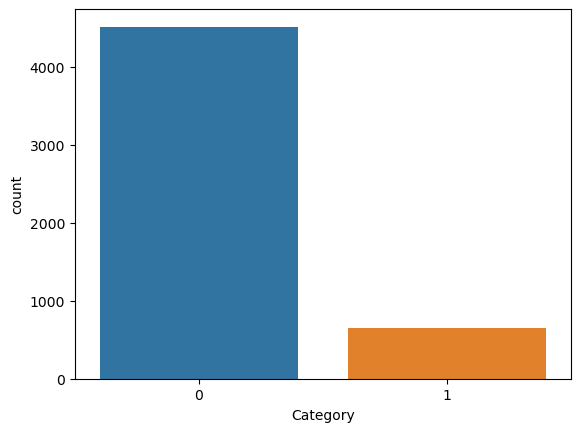

In [23]:
sns.countplot(df,x='Category')
plt.show()

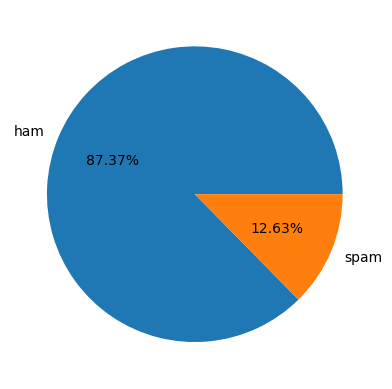

In [24]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%.2f%%')
plt.show()

## 4.2 Alphabet, Words, Sentence Counts

### 4.2.1 Import Libraries

In [25]:
import nltk
# nltk.download('punkt')

In [26]:
df['characters']=df['Text'].apply(len)
df['characters']

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: characters, Length: 5169, dtype: int64

In [27]:
df['words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df['sentence']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,Category,Text,characters,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
df.columns

Index(['Category', 'Text', 'characters', 'words', 'sentence'], dtype='object')

In [31]:
# For Spam
df[df['Category']==1][[ 'characters', 'words', 'sentence']].describe()

,characters,words,sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [32]:
# For non spam
df[df['Category']==0][[ 'characters', 'words', 'sentence']].describe()

,characters,words,sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


### 4.2. Plottig Graph 

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


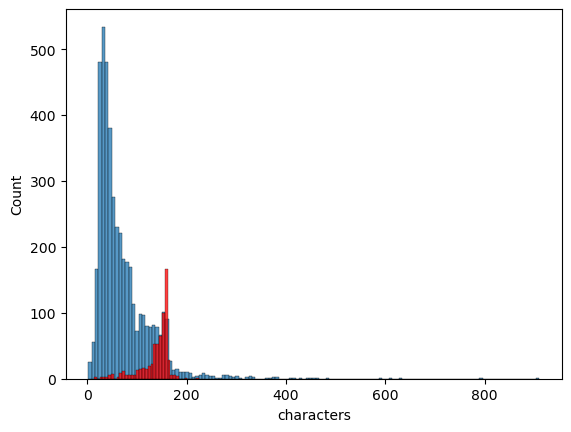

In [33]:
sns.histplot(df[df['Category']==0]['characters'])
sns.histplot(df[df['Category']==1]['characters'],color='red')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


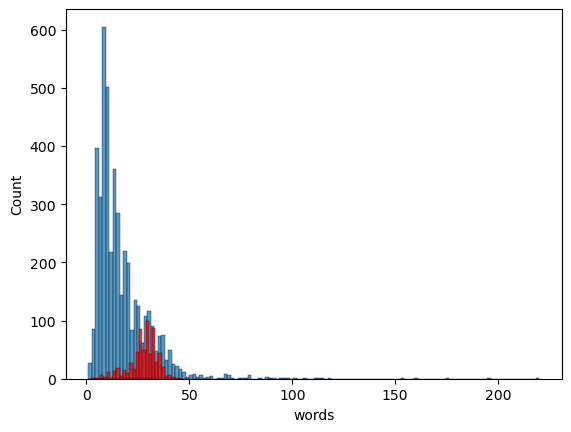

In [34]:
sns.histplot(df[df['Category']==0]['words'])
sns.histplot(df[df['Category']==1]['words'],color='red')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


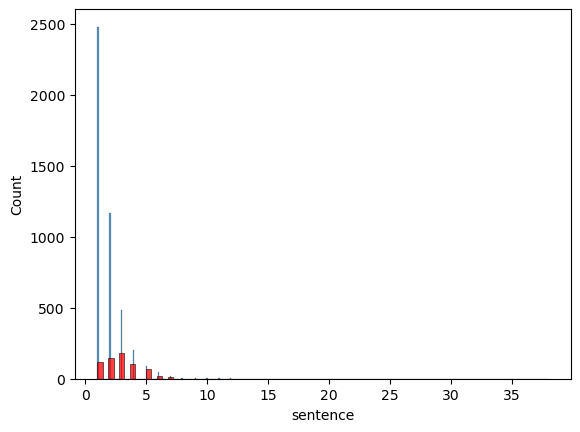

In [35]:
sns.histplot(df[df['Category']==0]['sentence'])
sns.histplot(df[df['Category']==1]['sentence'],color='red')
plt.show()

## Plotting inter-relationships

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


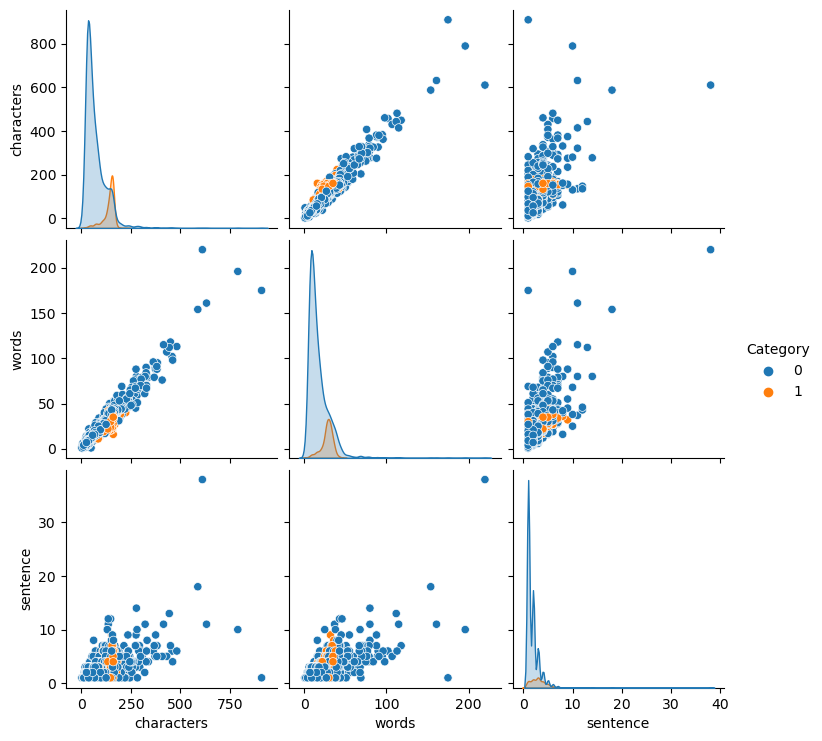

In [36]:
# df.columns
sns.pairplot(df,hue='Category')

<Axes: >

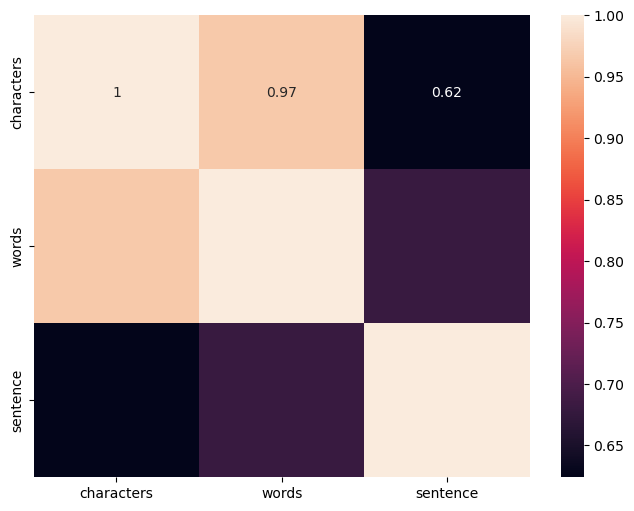

In [37]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['characters', 'words', 'sentence']].corr(),annot=True)

## Text Preprocessing

## Steps:

#### 1. Lowercase

#### 2. Tokenization

#### 3. Removing Special Characters

#### 4. Removing Stopwords,Punctuations

#### 5. Stemming

In [38]:
df.head()

,Category,Text,characters,words,sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


### Importing Libraries

In [39]:
from nltk.corpus import stopwords
import string                         #from punctuations
from nltk.stem.porter import PorterStemmer

In [40]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [41]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
def transform(text):
# 1. Lowercase
    text=text.lower()
# 2. Tokenize
    text=nltk.word_tokenize(text)
# 3. Removing special characters
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
# 4. Removing stopwords , punctuations
    for i in text:
        if(i not in string.punctuation and i not in stopwords.words()):
            y.append(i)
    text=y[:]
    y.clear()
    
# 5. Stemming
    ps=PorterStemmer()
    for i in text:
        y.append(ps.stem(i))
    # text=y[:]
    
    return ' '.join(y)

   

In [43]:
transform('I am Priya Joshi, Computer Applications Student')

'priya joshi comput applic student'

In [44]:
df['transformed_text']=df['Text'].apply(transform)

In [45]:
df.head()

,Category,Text,characters,words,sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,jurong point crazi avail bugi great world buff...
1,0,Ok lar... Joking wif u oni...,29,8,2,lar joke wif
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win cup final tkt 21st ...
3,0,U dun say so early hor... U c already then say...,49,13,1,dun earli
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,usf live
